In [1]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt

%matplotlib inline

/home/obs/.conda/envs/seticore/lib/python3.10/site-packages/blimpy/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
frame = stg.Frame(
    fchans=1024 * u.pixel,
    tchans=32 * u.pixel,
    df=2.7939677238464355 * u.Hz,
    dt=18.253611008 * u.s,
    fch1=6095.214842353016 * u.MHz,
)

In [3]:
noise = frame.add_noise_from_obs()
signal = frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=400), drift_rate=1.1 * u.Hz / u.s
    ),
    stg.constant_t_profile(level=frame.get_intensity(snr=25)),
    stg.gaussian_f_profile(width=100 * u.Hz),
    stg.constant_bp_profile(level=1),
)

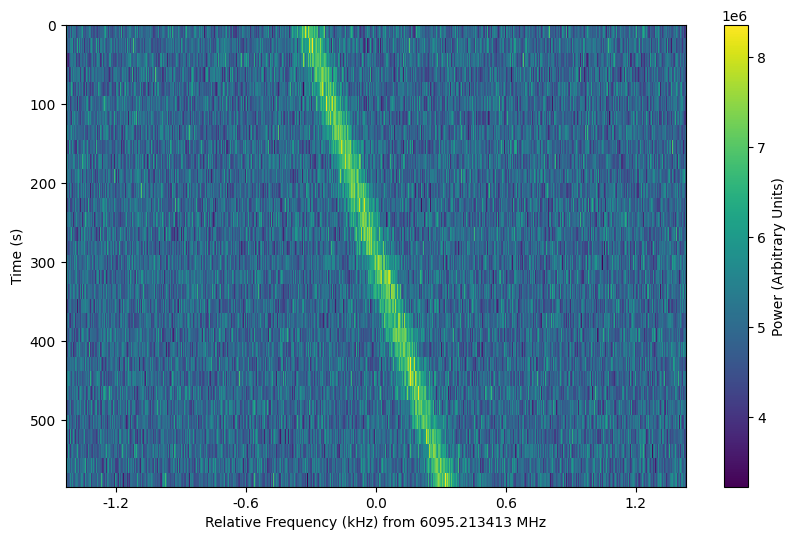

In [4]:
fig = plt.figure(figsize=(10, 6))
frame.plot(db=False)
plt.savefig("frame.png", bbox_inches="tight")

In [5]:
frame.save_h5(filename="test_frame_2.h5")

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for test_frame_2.h5 without blobbing.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.


ValueError: Unable to synchronously create dataset (error during user callback)

In [6]:
!echo $PATH

/home/obs/.conda/envs/seticore/bin:/opt/conda/condabin:/usr/local/cuda-11.7.1/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/home/obs/.local/bin


In [10]:
!pip -V

pip 25.1.1 from /home/obs/.conda/envs/seticore/lib/python3.10/site-packages/pip (python 3.10)


In [12]:
!pip list

Package                       Version
----------------------------- -------------------
alabaster                     1.0.0
anyio                         4.9.0
argon2-cffi                   25.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
astropy                       6.1.7
astropy-iers-data             0.2025.6.23.0.39.50
astroquery                    0.4.10
asttokens                     3.0.0
async-lru                     2.0.5
attrs                         25.3.0
babel                         2.17.0
backports.tarfile             1.2.0
beautifulsoup4                4.13.4
bleach                        6.2.0
blimpy                        2.1.4
cached-property               1.5.2
certifi                       2025.6.15
cffi                          1.17.1
charset-normalizer            3.4.2
click                         8.1.7
cloudpickle                   3.0.0
cmake                         3.31.0
comm                          0.2.2
contourpy             

In [13]:
!conda list

# packages in environment at /home/obs/.conda/envs/seticore:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
alabaster                 1.0.0                    pypi_0    pypi
anyio                     4.9.0                    pypi_0    pypi
argon2-cffi               25.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arpack                    3.9.1           nompi_hf03ea27_102    conda-forge
arrow                     1.3.0                    pypi_0    pypi
astropy                   6.1.7                    pypi_0    pypi
astropy-iers-data         0.2025.6.23.0.39.50          pypi_0    pypi
astroquery                0.4.10                   pypi_0    pypi
asttokens                 3.0.0                    pypi_0    pypi
async-lru                 2.0.5                   